<a href="https://colab.research.google.com/github/sahintarkan/Projects/blob/main/EDA_Autoscout_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis & Visualization with Python</p>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:10px 10px;">Data-Analysis-Autoscout</p>

<!-- ![image.png](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png) -->

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;"> </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Project Solution</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [Introduction](#0)
* [About Dataset](#1)
* [Importing Related Libraries](#2)
* [Recognizing & Understanding Data](#3)
* [Univariate & Multivariate Analysis](#4)    
* [Other Specific Analysis Questions](#5)
* [Dropping Similar & Unneccessary Features](#6)
* [Handling with Missing Values](#7)
* [Handling with Outliers](#8)    
* [Final Step to make ready dataset for ML Models](#9)
* [The End of the Project](#10)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Introduction</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

One of the most important components to any data science experiment that doesn’t get as much importance as it should is **``Exploratory Data Analysis (EDA)``**. In short, EDA is **``"A first look at the data"``**. It is a critical step in analyzing the data from an experiment. It is used to understand and summarize the content of the dataset to ensure that the features which we feed to our machine learning algorithms are refined and we get valid, correctly interpreted results.
In general, looking at a column of numbers or a whole spreadsheet and determining the important characteristics of the data can be very tedious and boring. Moreover, it is good practice to understand the problem statement and the data before you get your hands dirty, which in view, helps to gain a lot of insights. I will try to explain the concept using the Adult dataset/Census Income dataset available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Adult). The problem statement here is to predict whether the income exceeds 50k a year or not based on the census data.

# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">About Dataset</p>

<a id="1"></a>
<a href="#" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:blue; background-color:#dfa8e4" data-toggle="popover">Data-Analysis-Autoscout</a>


## Goal


**Content:**


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Related Libraries</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
import itertools
import missingno as msno
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression, LogisticRegression

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Reading the data from file</p>

# autoscout_data_2000.csv

In [ ]:
autoscout_orijin = pd.read_csv('./autoscout_data_2000.csv')
df = autoscout_orijin.copy()
df.head()

location                                                url  \
0   LOON OP ZAND, NL  https://www.autoscout24.com/offers/audi-a3-2-0...   
1        HEERLEN, NL  https://www.autoscout24.com/offers/audi-a3-spo...   
2          BREDA, NL  https://www.autoscout24.com/offers/audi-a3-1-4...   
3  BAARLE-NASSAU, NL  https://www.autoscout24.com/offers/audi-a1-1-4...   
4        ZUTPHEN, NL  https://www.autoscout24.com/offers/audi-a1-s-l...   

          make     model                                  short_description  \
0  \n,Audi ,\n  \n,A3,\n                          2.0 FSI Ambition Pro Line   
1  \n,Audi ,\n  \n,A3,\n  Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...   
2  \n,Audi ,\n  \n,A3,\n  1.4 TFSI Attraction Pro Line [ Navi Airco Crui...   
3  \n,Audi ,\n  \n,A1,\n    1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.   
4  \n,Audi ,\n  \n,A1,\n  S-Line | Automaat | Navigatie | Cruise-/Climat...   

                          price               mileage          gearbox  \
0   [['\n', '€ 4,450.-', '\n']]  ['', ['191,066 km']]  \n,Automatic,\n   
1  [['\n', '€ 12,950.-', '\n']]   ['', ['94,758 km']]  \n,Automatic,\n   
2  [['\n', '€ 12,445.-', '\n']]  ['', ['160,883 km']]  \n,Automatic,\n   
3  [['\n', '€ 12,450.-', '\n']]  ['', ['145,102 km']]  \n,Automatic,\n   
4  [['\n', '€ 14,945.-', '\n']]  ['', ['119,666 km']]  \n,Automatic,\n   

  registration       fuel_type             power                seller  \
0      08/2003  \n,Gasoline,\n  110 kW (150 hp),  ['\n', ['Dealer\n']]   
1      10/2013  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
2      05/2013  \n,Gasoline,\n   90 kW (122 hp),  ['\n', ['Dealer\n']]   
3      06/2015  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
4      10/2015  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   

       body_type        type   drivetrain seats doors  \
0  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n3   
1  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n5   
2  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5   
3  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5   
4  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n4   \n3   

               country_version offer_number        warranty         Mileage  \
0         Country version,None   \nSJ-112-R  \n,6 months,\n  [['\n'], ['']]   
1         Country version,None     \n809725      \n,None,\n  [['\n'], ['']]   
2         Country version,None   \n1-KJK-58      \n,None,\n  [['\n'], ['']]   
3  Country version,Netherlands    \n2601307  \n,6 months,\n  [['\n'], ['']]   
4         Country version,None   \nL-847-SK  \n,6 months,\n  [['\n'], ['']]   

  first_registration production_date general_inspection last_service  \
0            08/2003            None            05/2022         None   
1            10/2013            None               None         None   
2            05/2013            None            03/2022         None   
3            06/2015            2015                New         None   
4            10/2015            None               None         None   

  full_service_history non_smoker_vehicle      previous_owner  \
0            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   
1            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   
2           \n,None,\n         \n,None,\n  [['\n'], ['None']]   
3            \n,Yes,\n          \n,Yes,\n  [['\n'], ['None']]   
4            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   

  last_timing_belt_change                  Power          Gearbox  \
0      [['\n'], ['None']]  \n,110 kW (150 hp),\n  \n,Automatic,\n   
1      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   
2      [['\n'], ['None']]   \n,90 kW (122 hp),\n  \n,Automatic,\n   
3      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   
4      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   

      engine_size       gears cylinders    empty_weight       Fuel_type  \
0  \n,1,984 cc,\n  \n,None,\n   \n,4,\n  \n,1,280 kg,\n  \n,Supe

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Recognizing and Understanding Data</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1.Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

#### Check the head, shape, data-types

In [ ]:
display(df.head(3), df.sample(3), df.tail(3))

location                                                url  \
0  LOON OP ZAND, NL  https://www.autoscout24.com/offers/audi-a3-2-0...   
1       HEERLEN, NL  https://www.autoscout24.com/offers/audi-a3-spo...   
2         BREDA, NL  https://www.autoscout24.com/offers/audi-a3-1-4...   

          make     model                                  short_description  \
0  \n,Audi ,\n  \n,A3,\n                          2.0 FSI Ambition Pro Line   
1  \n,Audi ,\n  \n,A3,\n  Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...   
2  \n,Audi ,\n  \n,A3,\n  1.4 TFSI Attraction Pro Line [ Navi Airco Crui...   

                          price               mileage          gearbox  \
0   [['\n', '€ 4,450.-', '\n']]  ['', ['191,066 km']]  \n,Automatic,\n   
1  [['\n', '€ 12,950.-', '\n']]   ['', ['94,758 km']]  \n,Automatic,\n   
2  [['\n', '€ 12,445.-', '\n']]  ['', ['160,883 km']]  \n,Automatic,\n   

  registration       fuel_type             power                seller  \
0      08/2003  \n,Gasoline,\n  110 kW (150 hp),  ['\n', ['Dealer\n']]   
1      10/2013  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
2      05/2013  \n,Gasoline,\n   90 kW (122 hp),  ['\n', ['Dealer\n']]   

       body_type        type   drivetrain seats doors       country_version  \
0  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n3  Country version,None   
1  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n5  Country version,None   
2  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5  Country version,None   

  offer_number        warranty         Mileage first_registration  \
0   \nSJ-112-R  \n,6 months,\n  [['\n'], ['']]            08/2003   
1     \n809725      \n,None,\n  [['\n'], ['']]            10/2013   
2   \n1-KJK-58      \n,None,\n  [['\n'], ['']]            05/2013   

  production_date general_inspection last_service full_service_history  \
0            None            05/2022         None            \n,Yes,\n   
1            None               None         None            \n,Yes,\n   
2            None            03/2022         None           \n,None,\n   

  non_smoker_vehicle      previous_owner last_timing_belt_change  \
0         \n,None,\n  [['\n'], ['None']]      [['\n'], ['None']]   
1         \n,None,\n  [['\n'], ['None']]      [['\n'], ['None']]   
2         \n,None,\n  [['\n'], ['None']]      [['\n'], ['None']]   

                   Power          Gearbox     engine_size       gears  \
0  \n,110 kW (150 hp),\n  \n,Automatic,\n  \n,1,984 cc,\n  \n,None,\n   
1   \n,92 kW (125 hp),\n  \n,Automatic,\n  \n,1,395 cc,\n  \n,None,\n   
2   \n,90 kW (122 hp),\n  \n,Automatic,\n  \n,1,395 cc,\n  \n,None,\n   

  cylinders    empty_weight       Fuel_type  \
0   \n,4,\n  \n,1,280 kg,\n  \n,Super 95,\n   
1   \n,4,\n  \n,1,200 kg,\n  \n,Gasoline,\n   
2   \n,4,\n  \n,1,200 kg,\n  \n,Gasoline,\n   

                                   fuel_consumption  \
0                                        \n,None,\n   
1  ['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']   
2    ['\n', ['5 l/100 km (comb.)', ' ', ' '], '\n']   

                   co2_emissions emission_class emissions_sticker  \
0  ['\n', [' ', ' ', ' '], '\n']   \n,Euro 4,\n        \n,None,\n   
1                     \n,None,\n     \n,None,\n        \n,None,\n   
2         \n,116 g/km (comb.),\n     \n,None,\n        \n,None,\n   

                           \nComfort & Convenience\n  \
0  [['Air conditioning', 'Armrest', 'Automatic cl...   
1  [['Air conditioning', 'Automatic climate contr...   
2  [['Air conditioning', 'Armrest', 'Cruise contr...   

                           \nEntertainment & Media\n  \
0                           [['CD player', 'Radio']]   
1                           [['CD player', 'Radio']]   
2  [['Bluetooth', 'CD player', 'Hands-free equipm...   

                               \nSafety & Security\n  \
0  [['ABS', 'Alarm system', 'Central door lock', ...   
1  [['Alarm system', 'Central door lock', 'Centra...   
2  [['ABS', 'Central door lock', 'Central

location                                                url  \
34879        SCHAGEN, NL  https://www.autoscout24.com/offers/volkswagen-...   
56389  HEERHUGOWAARD, NL  https://www.autoscout24.com/offers/peugeot-200...   
23891           Uden, NL  https://www.autoscout24.com/offers/mercedes-be...   

                       make        model  \
34879     \n,Volkswagen ,\n   \n,Golf,\n   
56389        \n,Peugeot ,\n   \n,2008,\n   
23891  \n,Mercedes-Benz ,\n  \n,Viano,\n   

                                       short_description  \
34879  1.4 eHybrid 204 pk Automaat Style (Profiteer v...   
56389  1.2 PureTech Access AUTOMAAT, F1 FLIPPERS, PAR...   
23891  3.0 CDI Trend Edition Lang 150000KM !!! 7 PERS...   

                              price               mileage          gearbox  \
34879  [['\n', '€ 46,200.-', '\n']]       ['', ['15 km']]  \n,Automatic,\n   
56389  [['\n', '€ 12,999.-', '\n']]   ['', ['57,889 km']]  \n,Automatic,\n   
23891  [['\n', '€ 21,950.-', '\n']]  ['', ['150,900 km']]  \n,Automatic,\n   

      registration                fuel_type             power  \
34879      01/2021  \n,Electric/Gasoline,\n        [None, '']   
56389      01/2015           \n,Gasoline,\n    60 kW (82 hp),   
23891      11/2011             \n,Diesel,\n  165 kW (224 hp),   

                     seller               body_type        type   drivetrain  \
34879  ['\n', ['Dealer\n']]           \n,Compact,\n   \n,New,\n  \n,Front,\n   
56389  ['\n', ['Dealer\n']]  \n,Off-Road/Pick-up,\n  \n,Used,\n  \n,Front,\n   
23891  ['\n', ['Dealer\n']]               \n,Van,\n  \n,Used,\n   \n,Rear,\n   

      seats doors       country_version offer_number    warranty  \
34879   \n5   \n5  Country version,None     \n785259  \n,None,\n   
56389   \n5   \n5  Country version,None       None\n  \n,None,\n   
23891   \n6   \n5  Country version,None   \nK-130-KP  \n,None,\n   

              Mileage first_registration production_date general_inspection  \
34879  [['\n'], ['']]            01/2021            None               None   
56389  [['\n'], ['']]            01/2015            None                New   
23891  [['\n'], ['']]            11/2011            None            12/2022   

      last_service full_service_history non_smoker_vehicle  \
34879         None            \n,Yes,\n         \n,None,\n   
56389         None            \n,Yes,\n         \n,None,\n   
23891         None            \n,Yes,\n         \n,None,\n   

           previous_owner last_timing_belt_change                  Power  \
34879  [['\n'], ['None']]      [['\n'], ['None']]             \n,None,\n   
56389     [['\n'], ['1']]      [['\n'], ['None']]    \n,60 kW (82 hp),\n   
23891  [['\n'], ['None']]      [['\n'], ['None']]  \n,165 kW (224 hp),\n   

               Gearbox     engine_size       gears cylinders    empty_weight  \
34879  \n,Automatic,\n  \n,1,395 cc,\n     \n,6,\n   \n,4,\n  \n,1,590 kg,\n   
56389  \n,Automatic,\n  \n,1,199 cc,\n     \n,5,\n   \n,3,\n  \n,1,030 kg,\n   
23891  \n,Automatic,\n  \n,2,987 cc,\n  \n,None,\n   \n,6,\n  \n,2,290 kg,\n   

            Fuel_type                                   fuel_consumption  \
34879  \n,Super 95,\n                                             \n,,\n   
56389  \n,Gasoline,\n                                         \n,None,\n   
23891    \n,Diesel,\n  ['\n', ['8.5 l/100 km (comb.)', '10.9 l/100 km...   

                       co2_emissions emission_class emissions_sticker  \
34879           \n,0 g/km (comb.),\n     \n,None,\n        \n,None,\n   
56389  ['\n', [' ', ' ', ' '], '\n']     \n,None,\n        \n,None,\n   
23891         \n,224 g/km (comb.),\n   \n,Euro 5,\n        \n,None,\n   

                               \nComfort & Convenience\n  \
34879  [['Air conditioning', 'Armrest', 'Automatic cl...   
56389  [['Air conditioning', 'Automatic climate contr...   
23891  [['Air conditioning', 'Armrest', 'Cruise contr...   

                               \nEntertainment & Media\n  \
34879  [['Induction ch

location                                                url  \
71101     LELYSTAD, NL  https://www.autoscout24.com/offers/volvo-s60-2...   
71102    Amsterdam, NL  https://www.autoscout24.com/offers/volvo-s40-2...   
71103  SOESTERBERG, NL  https://www.autoscout24.com/offers/volvo-s60-2...   

               make      model  \
71101  \n,Volvo ,\n  \n,S60,\n   
71102  \n,Volvo ,\n  \n,S40,\n   
71103  \n,Volvo ,\n  \n,S60,\n   

                                       short_description  \
71101  2.0T Edition,1e Eigenaar,LPG G3,Onderbouw,Navi...   
71102                                                2.4   
71103      2.4 Airco, Cruise Control, Stuurbekrachtiging   

                             price               mileage       gearbox  \
71101  [['\n', '€ 3,449.-', '\n']]  ['', ['340,257 km']]  \n,Manual,\n   
71102  [['\n', '€ 1,650.-', '\n']]  ['', ['399,990 km']]  \n,Manual,\n   
71103    [['\n', '€ 944.-', '\n']]  ['', ['404,758 km']]  \n,Manual,\n   

      registration  fuel_type             power                        seller  \
71101      08/2004  \n,LPG,\n  132 kW (179 hp),          ['\n', ['Dealer\n']]   
71102      01/2004  \n,LPG,\n  103 kW (140 hp),  ['\n', ['Private seller\n']]   
71103      09/2001  \n,LPG,\n  104 kW (141 hp),          ['\n', ['Dealer\n']]   

         body_type        type   drivetrain seats doors       country_version  \
71101  \n,Sedan,\n  \n,Used,\n  \n,Front,\n   \n5   \n4  Country version,None   
71102  \n,Sedan,\n  \n,Used,\n  \n,Front,\n   \n5   \n4  Country version,None   
71103  \n,Sedan,\n  \n,Used,\n  \n,Front,\n   \n5   \n4  Country version,None   

      offer_number    warranty         Mileage first_registration  \
71101   \n75-PK-RN  \n,None,\n  [['\n'], ['']]            08/2004   
71102       None\n  \n,None,\n  [['\n'], ['']]            01/2004   
71103   \n26-HN-LS  \n,None,\n  [['\n'], ['']]            09/2001   

      production_date general_inspection last_service full_service_history  \
71101            None                New         None            \n,Yes,\n   
71102            None               None         None           \n,None,\n   
71103            None               None         None           \n,None,\n   

      non_smoker_vehicle      previous_owner last_timing_belt_change  \
71101         \n,None,\n     [['\n'], ['1']]      [['\n'], ['None']]   
71102         \n,None,\n  [['\n'], ['None']]      [['\n'], ['None']]   
71103         \n,None,\n  [['\n'], ['None']]      [['\n'], ['None']]   

                       Power       Gearbox     engine_size    gears cylinders  \
71101  \n,132 kW (179 hp),\n  \n,Manual,\n  \n,1,984 cc,\n  \n,5,\n   \n,5,\n   
71102  \n,103 kW (140 hp),\n  \n,Manual,\n      \n,None,\n  \n,5,\n   \n,5,\n   
71103  \n,104 kW (141 hp),\n  \n,Manual,\n  \n,2,435 cc,\n  \n,5,\n   \n,5,\n   

         empty_weight                         Fuel_type  \
71101  \n,1,495 kg,\n                         \n,LPG,\n   
71102      \n,None,\n  \n,Liquid petroleum gas (LPG),\n   
71103  \n,1,488 kg,\n  \n,Liquid petroleum gas (LPG),\n   

                                        fuel_consumption  \
71101  ['\n', ['9.1 l/100 km (comb.)', '12.6 l/100 km...   
71102                                         \n,None,\n   
71103  ['\n', ['8.4 l/100 km (comb.)', '11.6 l/100 km...   

                co2_emissions emission_class emissions_sticker  \
71101  \n,215 g/km (comb.),\n   \n,Euro 3,\n        \n,None,\n   
71102              \n,None,\n     \n,None,\n        \n,None,\n   
71103  \n,207 g/km (comb.),\n   \n,Euro 3,\n        \n,None,\n   

                               \nComfort & Convenience\n  \
71101  [['Air conditioning', 'Armrest', 'Automatic cl...   
71102  [['Air conditioning', 'Armrest', 'Automatic cl...   
71103  [['Air conditioning', 'Armrest', 'Automatic cl...   

                           \nEntertainment & Media\n  \
71101                        [['On-board computer']]   
71102  [['CD player', 'On-board computer', 'Radio']]   
71103               [['O

In [ ]:
df.shape

(71104, 49)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71104 entries, 0 to 71103
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   location                 71104 non-null  object
 1   url                      71104 non-null  object
 2   make                     71104 non-null  object
 3   model                    71104 non-null  object
 4   short_description        70935 non-null  object
 5   price                    71104 non-null  object
 6   mileage                  71104 non-null  object
 7   gearbox                  71104 non-null  object
 8   registration             71064 non-null  object
 9   fuel_type                71104 non-null  object
 10  power                    71104 non-null  object
 11  seller                   71104 non-null  object
 12  body_type                71104 non-null  object
 13  type                     71104 non-null  object
 14  drivetrain               71104 non-nul

#### Check if there are some dublicate rows

In [ ]:
df.duplicated().value_counts()

False    71104
dtype: int64

* There is not duplicated rows.

#### Check the statistical values of features

In [ ]:
# exclude='O'
df.describe().T

count unique  \
location                   71104   2446   
url                        71104  71104   
make                       71104     20   
model                      71104    767   
short_description          70935  60973   
price                      71104   8727   
mileage                    71104  50712   
gearbox                    71104     11   
registration               71064    305   
fuel_type                  71104     12   
power                      71104    371   
seller                     71104      5   
body_type                  71104     13   
type                       71104      6   
drivetrain                 71104      4   
seats                      71104     11   
doors                      71104      7   
country_version            71104     27   
offer_number               71104  56422   
warranty                   71104     17   
Mileage                    71104      2   
first_registration         71104    301   
production_date            71104     26   
general_inspection         71104     98   
last_service               71104      1   
full_service_history       71104      2   
non_smoker_vehicle         71104      2   
previous_owner             71104     13   
last_timing_belt_change    71104     85   
Power                      71104    367   
Gearbox                    71104      4   
engine_size                71104    459   
gears                      71104     10   
cylinders                  71104     11   
empty_weight               71104   1563   
Fuel_type                  71104     21   
fuel_consumption           71104   3906   
co2_emissions              71104    351   
emission_class             71104     11   
emissions_sticker          71104      6   
\nComfort & Convenience\n  71104  31067   
\nEntertainment & Media\n  71104   1972   
\nSafety & Security\n      71104  21125   
extras                     71104   9185   
\ncolour                   71104     15   
\nmanufacturer_color       71104      1   
\npaint                    71104      2   
 upholstery_colour         71104     12   
 upholstery                71104      7   

                                                                         top  \
location                                                       ROTTERDAM, NL   
url                        https://www.autoscout24.com/offers/audi-a3-2-0...   
make                                                              \n,BMW ,\n   
model                                                               \n,A3,\n   
short_description                                           1.4 TSI Highline   
price                                                     [['\n', '', '\n']]   
mileage                                                      ['', ['10 km']]   
gearbox                                                      \n,Automatic,\n   
registration                                                         01/2021   
fuel_type                                                     \n,Gasoline,\n   
power                                                             [None, '']   
seller                                                  ['\n', ['Dealer\n']]   
body_type                                             \n,Off-Road/Pick-up,\n   
type                                                              \n,Used,\n   
drivetrain                                                       \n,Front,\n   
seats                                                                    \n5   
doors                                                                    \n5   
country_version                                         Country version,None   
offer_number                                                          None\n   
warranty                                                          \n,None,\n   
Mileage                                                       [['\n'], ['']]   
first_registration                                                   01/2021   
production_date                     

Basic

In [ ]:
df.isnull().sum()

location                       0
url                            0
make                           0
model                          0
short_description            169
price                          0
mileage                        0
gearbox                        0
registration                  40
fuel_type                      0
power                          0
seller                         0
body_type                      0
type                           0
drivetrain                     0
seats                          0
doors                          0
country_version                0
offer_number                   0
warranty                       0
Mileage                        0
first_registration             0
production_date                0
general_inspection             0
last_service                   0
full_service_history           0
non_smoker_vehicle             0
previous_owner                 0
last_timing_belt_change        0
Power                          0
Gearbox   

In [ ]:
df.isnull().sum() / df.shape[0] * 100

location                    0.000
url                         0.000
make                        0.000
model                       0.000
short_description           0.238
price                       0.000
mileage                     0.000
gearbox                     0.000
registration                0.056
fuel_type                   0.000
power                       0.000
seller                      0.000
body_type                   0.000
type                        0.000
drivetrain                  0.000
seats                       0.000
doors                       0.000
country_version             0.000
offer_number                0.000
warranty                    0.000
Mileage                     0.000
first_registration          0.000
production_date             0.000
general_inspection          0.000
last_service                0.000
full_service_history        0.000
non_smoker_vehicle          0.000
previous_owner              0.000
last_timing_belt_change     0.000
Power         

#### If needed, rename the columns' names

In [ ]:
df.columns    

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'Mileage', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Power', 'Gearbox', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'Fuel_type', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [ ]:
# for i,j in enumerate(df.columns.str.lower().duplicated()):
#     if(j): df.columns[i]+'2'
#     else: df.columns[i]        

In [ ]:
df.columns = [df.columns[i]+'2' if j else df.columns[i] for i,j in enumerate(df.columns.str.lower().duplicated())]
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'Mileage2', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'Power2', 'Gearbox2', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'Fuel_type2', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n',
       '\nSafety & Security\n', 'extras', '\ncolour', '\nmanufacturer_color',
       '\npaint', ' upholstery_colour ', ' upholstery '],
      dtype='object')

In [ ]:
df.columns = df.columns.str.replace('\n', '').str.replace(' ', '').str.replace('&', '_').str.lower()
df.columns

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'mileage2', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'power2', 'gearbox2', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'fuel_type2', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery'],
      dtype='object')

In [ ]:
# df.describe(include='O').T

In [ ]:
object_col = df.select_dtypes(include='O').columns
object_col

Index(['location', 'url', 'make', 'model', 'short_description', 'price',
       'mileage', 'gearbox', 'registration', 'fuel_type', 'power', 'seller',
       'body_type', 'type', 'drivetrain', 'seats', 'doors', 'country_version',
       'offer_number', 'warranty', 'mileage2', 'first_registration',
       'production_date', 'general_inspection', 'last_service',
       'full_service_history', 'non_smoker_vehicle', 'previous_owner',
       'last_timing_belt_change', 'power2', 'gearbox2', 'engine_size', 'gears',
       'cylinders', 'empty_weight', 'fuel_type2', 'fuel_consumption',
       'co2_emissions', 'emission_class', 'emissions_sticker',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'colour', 'manufacturer_color', 'paint', 'upholstery_colour',
       'upholstery'],
      dtype='object')

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

#### Basically check the missing values

In [ ]:
# for col in object_col:
#     print('#Colums Name:', col, '#Size:', df[col].shape)
#     print("//"*20)
#     print(df[col].value_counts(dropna=False))
#     print("--"*20)

```
#Colums Name: short_description #Size: (71104,)
NaN                             169

#Colums Name: price #Size: (71104,)
[['\n', '', '\n']]              1570

#Colums Name: gearbox #Size: (71104,)
['\n', None, '\n']              97

#Colums Name: power #Size: (71104,)
[None, '']                      6059

#Colums Name: type #Size: (71104,)
\n,None,\n                      1074

#Colums Name: drivetrain #Size: (71104,)
\n,None,\n                      16465

#Colums Name: seats #Size: (71104,)
None\n                          5542

#Colums Name: doors #Size: (71104,)
None\n                          1314

#Colums Name: country_version #Size: (71104,)
Country version,None            62081
Country version,Netherlands     7750

#Colums Name: offer_number #Size: (71104,)
None\n                          11277

#Colums Name: warranty #Size: (71104,)
\n,None,\n                      47095

#Colums Name: Mileage #Size: (71104,)
////////////////////////////////////////
[['\n'], ['']]                  70951
[['\n'], ['None']]              153

#Colums Name: production_date #Size: (71104,)
None                            63688

#Colums Name: general_inspection #Size: (71104,)
New                             17594
None                            17024

#Colums Name: last_service #Size: (71104,)
////////////////////////////////////////
None                            71104

#Colums Name: full_service_history #Size: (71104,)
\n,None,\n                      22348

#Colums Name: non_smoker_vehicle #Size: (71104,)
\n,None,\n                      65424

#Colums Name: previous_owner #Size: (71104,)
[['\n'], ['None']]              66178

#Colums Name: last_timing_belt_change #Size: (71104,)
[['\n'], ['None']]              70154

#Colums Name: Power #Size: (71104,)
\n,None,\n                      6055

#Colums Name: Gearbox #Size: (71104,)
\n,None,\n                      95

#Colums Name: engine_size #Size: (71104,)
\n,None,\n                      5839

#Colums Name: gears #Size: (71104,)
\n,None,\n                      20627

#Colums Name: cylinders #Size: (71104,)
\n,None,\n                      6295

#Colums Name: empty_weight #Size: (71104,)
\n,None,\n                      1604

#Colums Name: Fuel_type #Size: (71104,)
\n,None,\n                      9941

#Colums Name: fuel_consumption #Size: (71104,)
\n,None,\n                      13276
\n,,\n                          8233

#Colums Name: co2_emissions #Size: (71104,)
\n,None,\n                      11179
['\n', [' ', ' ', ' '], '\n']   7735

#Colums Name: emission_class #Size: (71104,)
\n,None,\n                      21591
['\n', [' ', ' ', ' '], '\n']   679

#Colums Name: emissions_sticker #Size: (71104,)
\n,None,\n                      70950
['\n', [' ', ' ', ' '], '\n']   12

#Colums Name: 
colour #Size: (71104,)
None                            1197

#Colums Name: 
manufacturer_color #Size: (71104,)
None                            71104

#Colums Name: 
paint #Size: (71104,)
None                            20825

#Colums Name:  upholstery_colour  #Size: (71104,)
None                            24795

#Colums Name:  upholstery  #Size: (71104,)
None                            12101
```

#### Clean Basic Strange Values

- strip `['\n', [' ', ' ', ' '], '\n']`

In [ ]:
df["price"][1].strip("\\n\n,[ ]'-.")

'€ 12,950'

In [ ]:
df = df.applymap(lambda x: x.strip("\\n\n,[ ]'-.") if type(x)==str else x)

- replace `Country version,Netherlands`

In [ ]:
df.country_version = df.country_version.apply(lambda x: x.replace("Country version,", ''))

In [ ]:
df.sample(3)

location                                                url  make  \
0  LOON OP ZAND, NL  https://www.autoscout24.com/offers/audi-a3-2-0...  Audi   
1       HEERLEN, NL  https://www.autoscout24.com/offers/audi-a3-spo...  Audi   
2         BREDA, NL  https://www.autoscout24.com/offers/audi-a3-1-4...  Audi   

  model                                  short_description     price  \
0    A3                          2.0 FSI Ambition Pro Line   € 4,450   
1    A3  Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...  € 12,950   
2    A3   1.4 TFSI Attraction Pro Line [ Navi Airco Cruise  € 12,445   

      mileage    gearbox registration fuel_type            power  seller  \
0  191,066 km  Automatic      08/2003  Gasoline  110 kW (150 hp)  Dealer   
1   94,758 km  Automatic      10/2013  Gasoline   92 kW (125 hp)  Dealer   
2  160,883 km  Automatic      05/2013  Gasoline   90 kW (122 hp)  Dealer   

  body_type  type drivetrain seats doors country_version offer_number  \
0   Compact  Used      Front     5     3            None     SJ-112-R   
1   Compact  Used      Front     5     5            None       809725   
2   Compact  Used       None     5     5            None     1-KJK-58   

   warranty mileage2 first_registration production_date general_inspection  \
0  6 months                     08/2003            None            05/2022   
1      None                     10/2013            None               None   
2      None                     05/2013            None            03/2022   

  last_service full_service_history non_smoker_vehicle previous_owner  \
0         None                  Yes               None           None   
1         None                  Yes               None           None   
2         None                 None               None           None   

  last_timing_belt_change           power2   gearbox2 engine_size gears  \
0                    None  110 kW (150 hp)  Automatic    1,984 cc  None   
1                    None   92 kW (125 hp)  Automatic    1,395 cc  None   
2                    None   90 kW (122 hp)  Automatic    1,395 cc  None   

  cylinders empty_weight fuel_type2      fuel_consumption     co2_emissions  \
0         4     1,280 kg   Super 95                  None                     
1         4     1,200 kg   Gasoline  4.9 l/100 km (comb.)              None   
2         4     1,200 kg   Gasoline    5 l/100 km (comb.)  116 g/km (comb.)   

  emission_class emissions_sticker  \
0         Euro 4              None   
1           None              None   
2           None              None   

                                 comfort_convenience  \
0  Air conditioning', 'Armrest', 'Automatic clima...   
1  Air conditioning', 'Automatic climate control'...   
2  Air conditioning', 'Armrest', 'Cruise control'...   

                                 entertainment_media  \
0                                 CD player', 'Radio   
1                                 CD player', 'Radio   
2  Bluetooth', 'CD player', 'Hands-free equipment...   

                                     safety_security                   extras  \
0  ABS', 'Alarm system', 'Central door lock', 'Ce...             Alloy wheels   
1  Alarm system', 'Central door lock', 'Central d...       Alloy wheels (16")   
2  ABS', 'Central door lock', 'Central door lock ...  Alloy wheels', 'Spoiler   

     colour manufacturer_color            paint  upholstery_colour upholstery  
0   4, Grey               None  paint, Metallic  upholstery, Black   8, Cloth  
1  4, White               None             None  upholstery, Black   8, Cloth  
2  4, Black               None  paint, Metallic               None       None

In [ ]:
for col in object_col:
    print("//"*20)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

////////////////////////////////////////
ROTTERDAM, NL              1570
APELDOORN, NL              1256
AMSTERDAM, NL              1032
TILBURG, NL                 968
ALKMAAR, NL                 741
                           ... 
Molenaarsgraaf, NL            1
hooge mierdw, NL              1
Kalmthout, NL                 1
De Kwakel, NL                 1
Utrechtse Heuvelrug, NL       1
Name: location, Length: 2441, dtype: int64
----------------------------------------
////////////////////////////////////////
https://www.autoscout24.com/offers/audi-a3-2-0-fsi-ambition-pro-line-gasoline-grey-11c36265-2a5c-41e7-8d4f-0bc7177ee8e9?source=list_searchresults                                       1
https://www.autoscout24.com/offers/honda-jazz-1-5-e-hev-elegance-automaat-all-in-rijklrprs-h-electric-gasoline-grey-7d3bcfe3-3ac4-4529-bb8a-000b277089d4?source=list_searchresults      1
https://www.autoscout24.com/offers/honda-jazz-1-4-hybrid-elegance-automaat-panodak-parkeersen-electric-gasolin

None        11277
NIEUW          55
               32
XX             29
1776           14
            ...  
N-481-PD        1
N-715-LP        1
N-696-KL        1
NF-124-B        1
26-HN-LS        1
Name: offer_number, Length: 56421, dtype: int64
----------------------------------------
////////////////////////////////////////
None         47095
6 months     18864
3 months      1854
12 months     1519
24 months     1176
1 months       279
84 months      231
18 months       40
36 months       15
2 months        10
48 months        7
Yes              5
60 months        3
26 months        2
9 months         2
10 months        1
4 months         1
Name: warranty, dtype: int64
----------------------------------------
////////////////////////////////////////
        70951
None      153
Name: mileage2, dtype: int64
----------------------------------------
////////////////////////////////////////
01/2021    3270
01/2022    1424
12/2016     814
03/2021     788
06/2021     733
           ... 
07/

Alloy wheels (16")                                                                                                                                                                  2410
Trailer hitch                                                                                                                                                                       2001
Alloy wheels                                                                                                                                                                        1811
Alloy wheels (17")', 'Automatically dimming interior mirror                                                                                                                         1252
Alloy wheels (17")                                                                                                                                                                  1155
                                                                           

In [ ]:
df[ df.isin(['None']) ].count()

location                       0
url                            0
make                           0
model                         10
short_description              0
price                          0
mileage                        0
gearbox                       97
registration                   0
fuel_type                      0
power                       6059
seller                         0
body_type                   1074
type                        1074
drivetrain                 16465
seats                       5542
doors                       1314
country_version            62081
offer_number               11277
warranty                   47095
mileage2                     153
first_registration            40
production_date            63688
general_inspection         17024
last_service               71104
full_service_history       22348
non_smoker_vehicle         65424
previous_owner             66178
last_timing_belt_change    70154
power2                      6055
gearbox2  

In [ ]:
df[ df.isin(['None']) ].any()

location                   False
url                        False
make                       False
model                       True
short_description          False
price                      False
mileage                    False
gearbox                     True
registration               False
fuel_type                  False
power                       True
seller                     False
body_type                   True
type                        True
drivetrain                  True
seats                       True
doors                       True
country_version             True
offer_number                True
warranty                    True
mileage2                    True
first_registration          True
production_date             True
general_inspection          True
last_service                True
full_service_history        True
non_smoker_vehicle          True
previous_owner              True
last_timing_belt_change     True
power2                      True
gearbox2  

In [ ]:
df[ df.isin(['']) ].count()

location                       0
url                            0
make                           0
model                          0
short_description             22
price                       1570
mileage                        0
gearbox                        0
registration                   0
fuel_type                      0
power                          0
seller                         0
body_type                      0
type                           0
drivetrain                     0
seats                          0
doors                          0
country_version                0
offer_number                  32
warranty                       0
mileage2                   70951
first_registration             0
production_date                0
general_inspection             0
last_service                   0
full_service_history           0
non_smoker_vehicle             0
previous_owner                 0
last_timing_belt_change        0
power2                         0
gearbox2  

In [ ]:
df[ df.isin(['']) ].any()

location                   False
url                        False
make                       False
model                      False
short_description          False
price                      False
mileage                    False
gearbox                    False
registration               False
fuel_type                  False
power                      False
seller                     False
body_type                  False
type                       False
drivetrain                 False
seats                      False
doors                      False
country_version            False
offer_number               False
warranty                   False
mileage2                   False
first_registration         False
production_date            False
general_inspection         False
last_service               False
full_service_history       False
non_smoker_vehicle         False
previous_owner             False
last_timing_belt_change    False
power2                     False
gearbox2  

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Univariate & Multivariate Analysis</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Examine all features (first target feature, then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by target feature
5. Check the statistical values by target feature
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count/percentage in each target feature by categories and visualize it with a suitable plot
5. Check the percentage distribution in each target feature by categories and visualize it with suitable plot
6. Check the count in each categories by target feature and visualize it with a suitable plot
7. Check the percentage distribution in each categories by target feature and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** Instruction/direction for each feature is available under the corresponding feature in detail, as well.

In [ ]:
df.sample(60)

location  \
30247           HENGELO OV, NL   
23219            ROTTERDAM, NL   
49575              TILBURG, NL   
17904               ARNHEM, NL   
32856               GIETEN, NL   
39238           DOETINCHEM, NL   
16786               GENNEP, NL   
40501               HOUTEN, NL   
51048              TILBURG, NL   
4140            HARDERWIJK, NL   
16492            MARGRATEN, NL   
44552                DELFT, NL   
55630              WIJCHEN, NL   
67012           AMERSFOORT, NL   
17914          ZEVENBERGEN, NL   
32868               BOXTEL, NL   
50358           SLIEDRECHT, NL   
46892  Hendrik Ido ambacht, NL   
36054               ALMERE, NL   
48170               HOLTUM, NL   
84     LOENEN AAN DE VECHT, NL   
35710         WENUM WIESEL, NL   
63529         Krabbendijke, NL   
11190             DRACHTEN, NL   
37560             LELYSTAD, NL   
45076             POELDIJK, NL   
56561               DONGEN, NL   
2523          VELSEN-NOORD, NL   
5180             GRONINGEN, NL   
20231   AMSTERDAM ZUIDOOST, NL   
59404           RIJSBERGEN, NL   
45665       OUD-BEIJERLAND, NL   
52257           HARDERWIJK, NL   
12056            EINDHOVEN, NL   
65173           ROOSENDAAL, NL   
8852               DEN HAM, NL   
44251              KLIMMEN, NL   
8022               Tilburg, NL   
30027              LIEMPDE, NL   
22319                EEFDE, NL   
8165                Dussen, NL   
32750        Heerhugowaard, NL   
42836               ZELHEM, NL   
9671              LIEVELDE, NL   
27371             ZEEWOLDE, NL   
35110            AMSTERDAM, NL   
29830             BREEZAND, NL   
16826                 VEEN, NL   
38205            GORREDIJK, NL   
36281         ALBLASSERDAM, NL   
44279            Veldhoven, NL   
33903                TEUGE, NL   
69671              SITTARD, NL   
31457  ALPHEN AAN DEN RIJN, NL   
27546               LEIDEN, NL   
29590             POELDIJK, NL   
616             RIDDERKERK, NL   
50059              TILBURG, NL   
35399            WAVERVEEN, NL   
45084     BERG EN TERBLIJT, NL   

                                                     url           make  \
30247  https://www.autoscout24.com/offers/volkswagen-...      Volkswage   
23219  https://www.autoscout24.com/offers/mercedes-be...  Mercedes-Benz   
49575  https://www.autoscout24.com/offers/hyundai-bay...        Hyundai   
17904  https://www.autoscout24.com/offers/ford-mustan...           Ford   
32856  https://www.autoscout24.com/offers/volkswagen-...      Volkswage   
39238  https://www.autoscout24.com/offers/renault-mas...        Renault   
16786  https://www.autoscout24.com/offers/ford-tourne...           Ford   
40501  https://www.autoscout24.com/offers/citroen-c3-...         Citroe   
51048  https://www.autoscout24.com/offers/kia-ceed-sw...            Kia   
4140   https://www.autoscout24.com/offers/audi-q5-3-0...           Audi   
16492  https://www.autoscout24.com/offers/ford-s-max-...           Ford   
44552  https://www.autoscout24.com/offers/fiat-500c-1...           Fiat   
55630  https://www.autoscout24.com/offers/peugeot-208...        Peugeot   
67012  https://www.autoscout24.com/offers/volvo-xc40-...          Volvo   
17914  https://www.autoscout24.com/offers/ford-mustan...           Ford   
32868  https://www.autoscout24.com/offers/volkswagen-...      Volkswage   
50358  https://www.autoscout24.com/offers/kia-sportag...            Kia   
46892  https://www.autoscout24.com/offers/honda-accor...          Honda   
36054  https://www.autoscout24.com/offers/renault-meg...        Renault   
48170  https://www.autoscout24.com/offers/hyundai-ix3...        Hyundai   
84     https://www.autoscout24.com/offers/audi-a1-spo...           Audi   
35710  https://www.autoscout24.com/offers/renault-cli...        Renault   
63529  https://www.autoscout24.com/offers/toyota-rav-...         Toyota   
11190  https://www.autoscout24.com/offers/bmw-x5-xdri...            BMW   
37560  https://www.autoscout24.com/offers/renault-meg...        Renault 

## Target Feature:

## imdb_score

In [ ]:
titles.groupby('type')['imdb_score'].value_counts()

type   imdb_score
MOVIE  6.200         139
       6.300         137
       6.500         136
       6.600         134
       6.400         123
                    ... 
SHOW   1.800           1
       2.600           1
       3.100           1
       3.600           1
       9.500           1
Name: imdb_score, Length: 141, dtype: int64

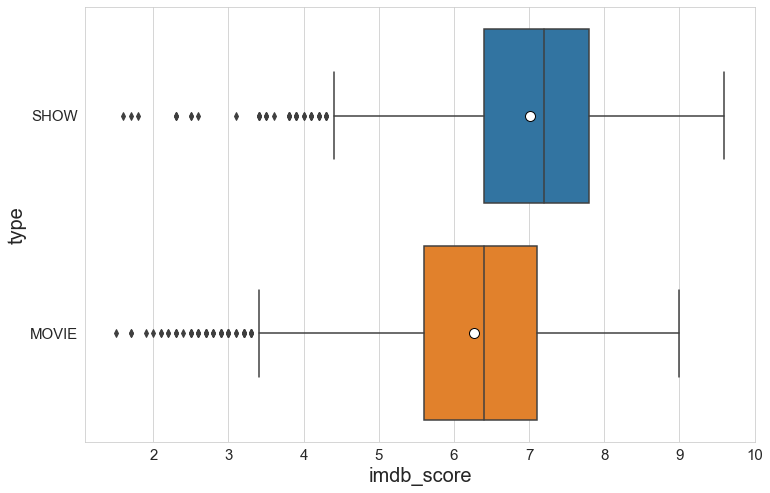

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=titles, 
            x="imdb_score",
            y='type',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
           ax=ax);
    
# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

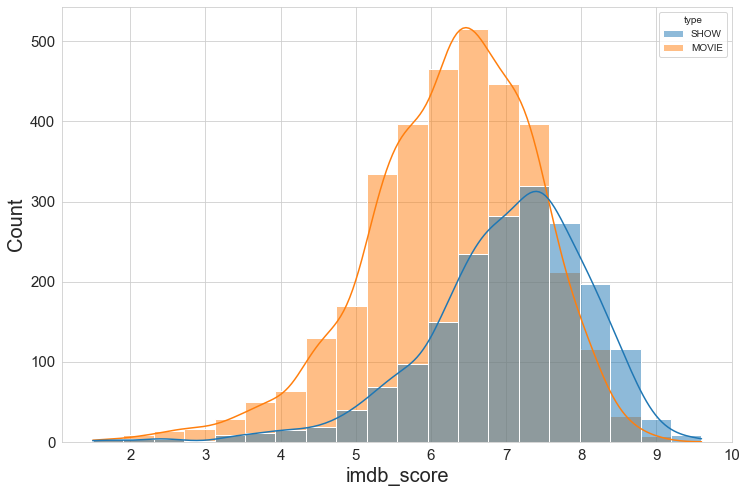

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(x="imdb_score", hue='type', data=titles, kde=True, bins=20, ax=ax)

# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [ ]:
titles_imdb_score_count_per = titles.groupby('type')['imdb_score'].value_counts(normalize=True).to_frame().unstack(0)
titles_imdb_score_count_per.index = titles_imdb_score_count_per.index.astype(int)
titles_imdb_score_count_per = titles_imdb_score_count_per.groupby(level=0).mean()
titles_imdb_score_count_per.drop(index=[1,2,3], inplace=True)
titles_imdb_score_count_per

imdb_score      
type            MOVIE  SHOW
imdb_score                 
4               0.008 0.003
5               0.024 0.010
6               0.036 0.028
7               0.024 0.039
8               0.005 0.018
9               0.001 0.002

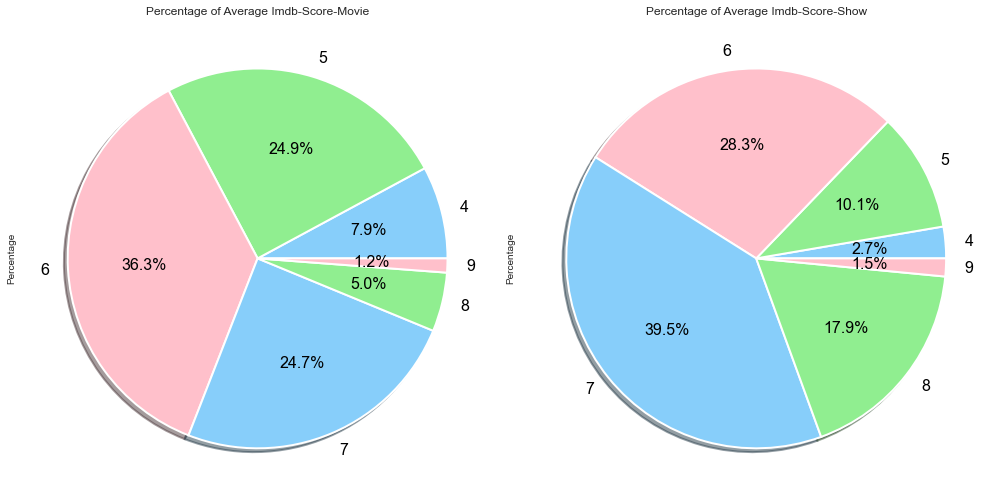

In [ ]:
titles_imdb_score_count_per.plot.pie(
                            subplots=True, layout=(1,2),
                            legend=False,
                            colors=["lightskyblue","Lightgreen", 'pink'], 
                            autopct="%.1f%%",
                            shadow=True,
#                             explode=[0, 0.1],
                            title=["Percentage of Average Imdb-Score-Movie", "Percentage of Average Imdb-Score-Show"],
#                             labels="xlabel",
                            ylabel= "Percentage",
                            textprops={'fontsize':16, 'color':'k'},
                            wedgeprops = {'linewidth':2, 'edgecolor':'white'},
                            startangle=0,
                            figsize=(14,8))

plt.tight_layout()

**Check the statistical values**

In [ ]:
titles.groupby('type')['imdb_score'].describe().T

type     MOVIE     SHOW
count 3407.000 1876.000
mean     6.267    7.017
std      1.117    1.080
min      1.500    1.600
25%      5.600    6.400
50%      6.400    7.200
75%      7.100    7.800
max      9.000    9.600

**Write down the conclusions you draw from your analysis**

**Result :** .................

## tmdb_score

In [ ]:
titles.groupby('type')['tmdb_score'].value_counts()

type   tmdb_score
MOVIE  7.000         181
       6.500         169
       6.000         161
       6.800         158
       6.300         147
                    ... 
SHOW   3.600           1
       4.400           1
       4.600           1
       4.800           1
       9.600           1
Name: tmdb_score, Length: 137, dtype: int64

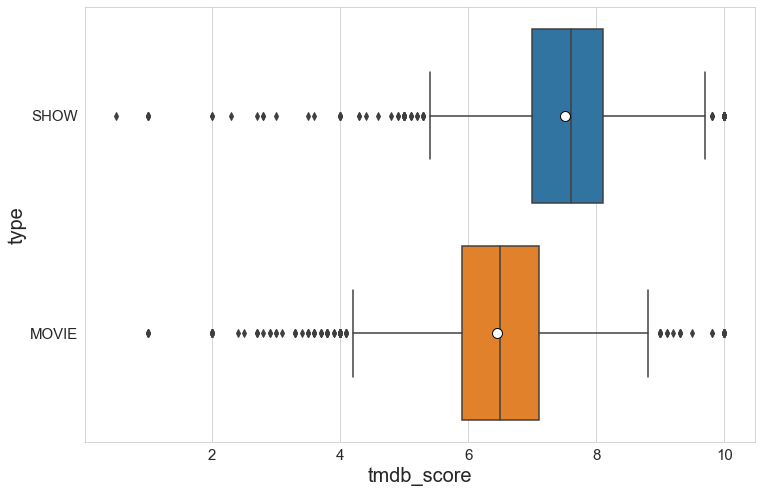

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=titles, 
            x="tmdb_score",
            y='type',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
           ax=ax);
    
# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

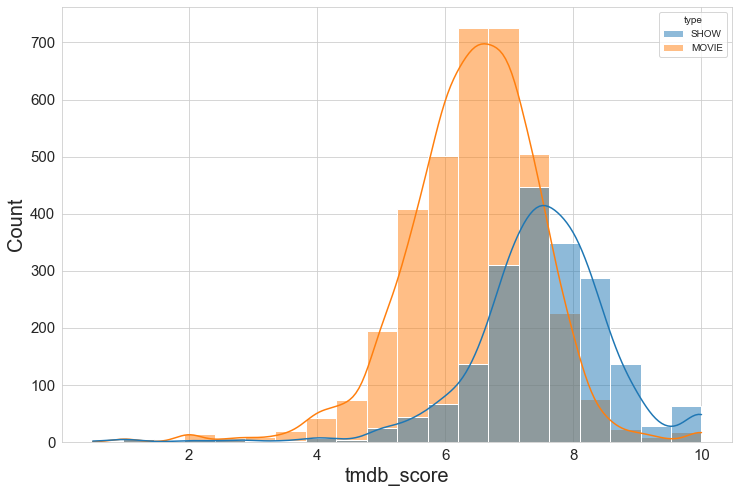

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(x="tmdb_score", hue='type', data=titles, kde=True, bins=20, ax=ax)

# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

In [ ]:
titles_tmdb_score_count_per = titles.groupby('type')['tmdb_score'].value_counts(normalize=True).to_frame().unstack(0)
titles_tmdb_score_count_per.index = titles_tmdb_score_count_per.index.astype(int)
titles_tmdb_score_count_per = titles_tmdb_score_count_per.groupby(level=0).mean()
titles_tmdb_score_count_per.drop(index=[1,2,3], inplace=True)
titles_tmdb_score_count_per

tmdb_score      
type            MOVIE  SHOW
tmdb_score                 
0                 NaN 0.001
4               0.005 0.001
5               0.021 0.004
6               0.040 0.017
7               0.027 0.044
8               0.005 0.026
9               0.001 0.004
10              0.004 0.029

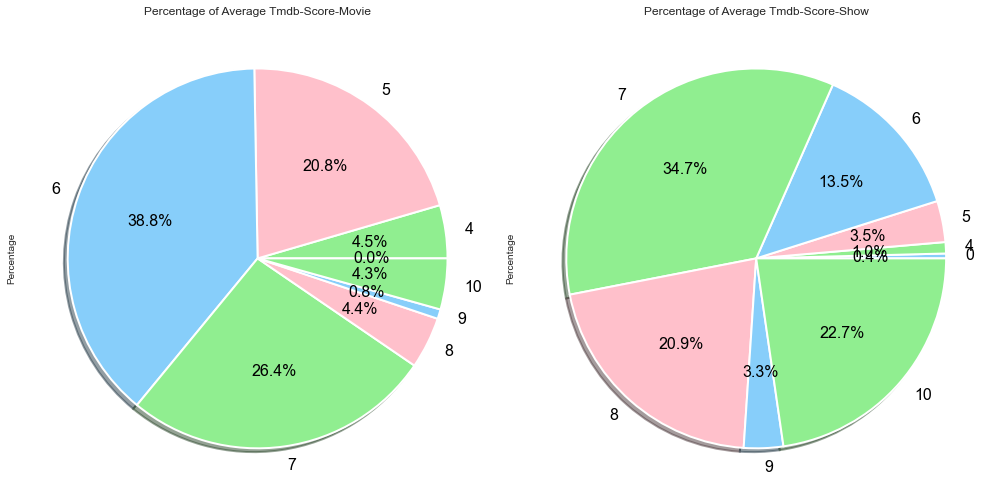

In [ ]:
titles_tmdb_score_count_per.plot.pie(
                            subplots=True, layout=(1,2),
                            legend=False,
                            colors=["lightskyblue","Lightgreen", 'pink'], 
                            autopct="%.1f%%",
                            shadow=True,
#                             explode=[0, 0.1],
                            title=["Percentage of Average Tmdb-Score-Movie", "Percentage of Average Tmdb-Score-Show"],
#                             labels="xlabel",
                            ylabel= "Percentage",
                            textprops={'fontsize':16, 'color':'k'},
                            wedgeprops = {'linewidth':2, 'edgecolor':'white'},
                            startangle=0,
                            figsize=(14,8))

plt.tight_layout()

**Check the statistical values**

In [ ]:
titles.groupby('type').tmdb_score.describe().T

type     MOVIE     SHOW
count 3573.000 1915.000
mean     6.450    7.505
std      1.041    1.090
min      1.000    0.500
25%      5.900    7.000
50%      6.500    7.600
75%      7.100    8.100
max     10.000   10.000

**Check the boxplot and histplot/kdeplot by "imdb_score" levels**

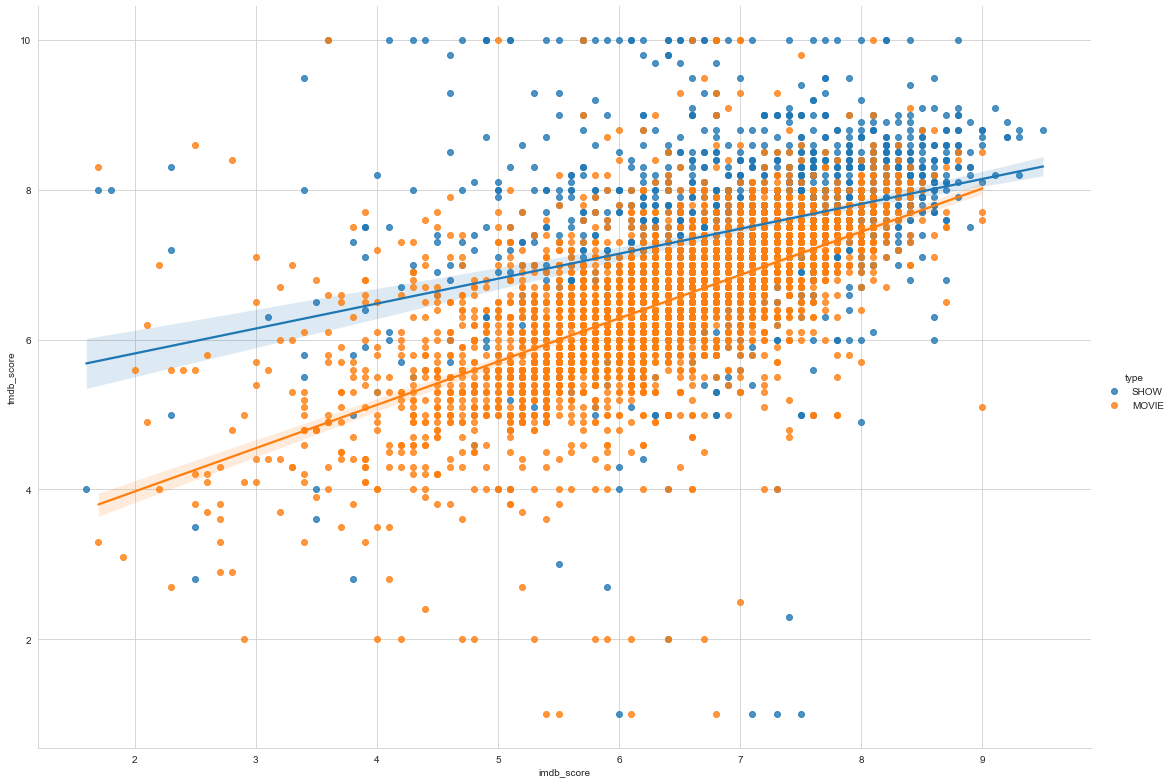

In [ ]:
sns.lmplot(x='imdb_score', y='tmdb_score', data=titles, hue='type', height=11, aspect=1.4)

## Numeric Features

In [ ]:
titles.describe().T

count      mean       std      min      25%      50%  \
release_year    5806.000  2016.013     7.325 1945.000 2015.000 2018.000   
runtime         5806.000    77.644    39.474    0.000   44.000   84.000   
seasons         2047.000     2.166     2.636    1.000    1.000    1.000   
imdb_score      5283.000     6.533     1.161    1.500    5.800    6.600   
imdb_votes      5267.000 23407.195 87134.316    5.000  521.000 2279.000   
tmdb_popularity 5712.000    22.526    68.849    0.009    3.155    7.478   
tmdb_score      5488.000     6.818     1.172    0.500    6.100    6.900   

                      75%         max  
release_year     2020.000    2022.000  
runtime           105.000     251.000  
seasons             2.000      42.000  
imdb_score          7.400       9.600  
imdb_votes      10144.000 2268288.000  
tmdb_popularity    17.776    1823.374  
tmdb_score          7.500      10.000

## release_year

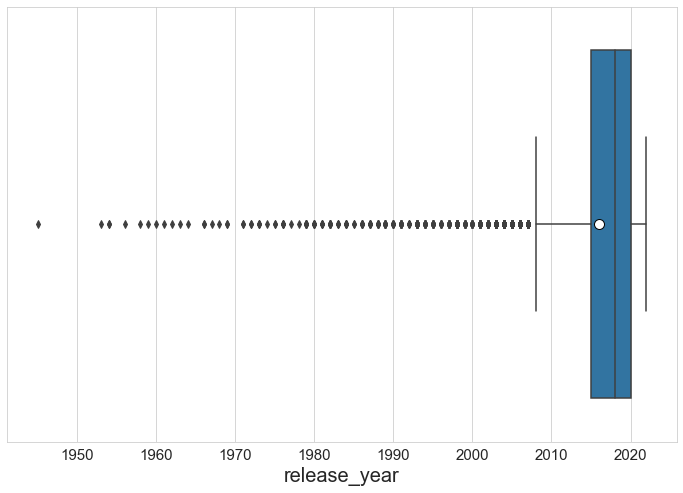

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(data=titles, 
            x="release_year",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"},
           ax=ax);
    
# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

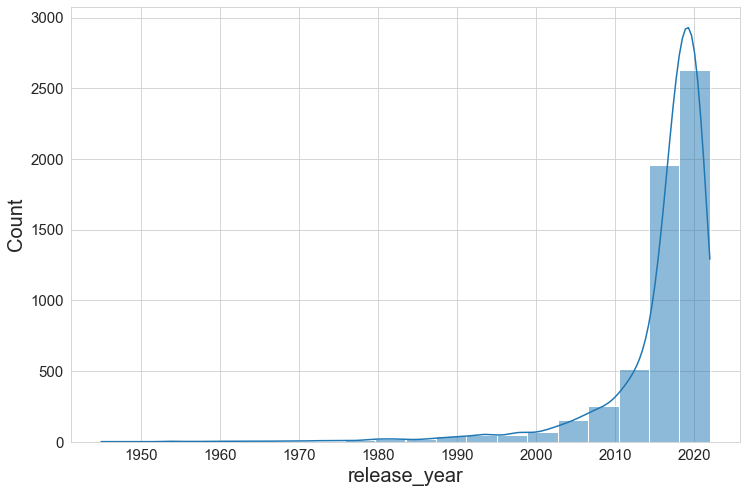

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(x="release_year", data=titles, kde=True, bins=20, ax=ax)

# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

**Check the statistical values**

In [ ]:
titles.release_year.describe()

count   5806.000
mean    2016.013
std        7.325
min     1945.000
25%     2015.000
50%     2018.000
75%     2020.000
max     2022.000
Name: release_year, dtype: float64

**Check the boxplot and histplot/kdeplot by "imdb_score" levels**

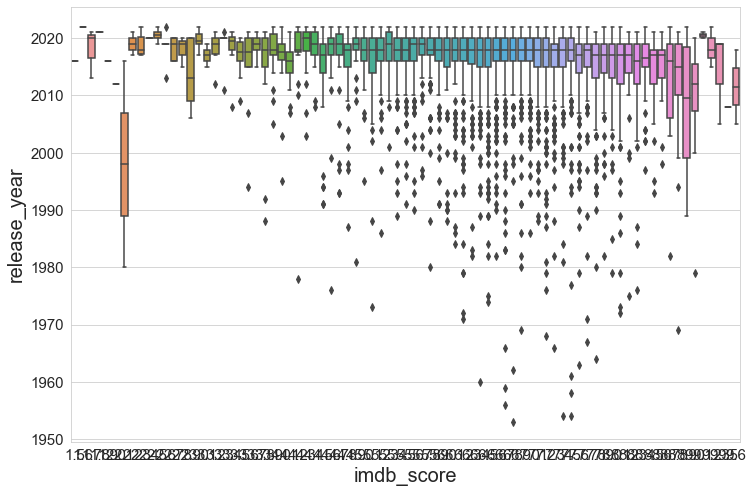

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x='imdb_score', y='release_year', data=titles, ax=ax)
    
# # setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

NameError: name 'df' is not defined

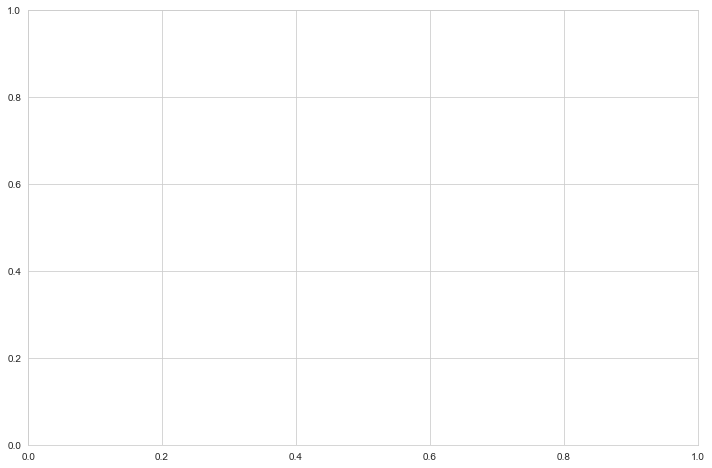

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(x='age', data=df, hue='salary', kde=True, bins=20, ax=ax)

NameError: name 'df' is not defined

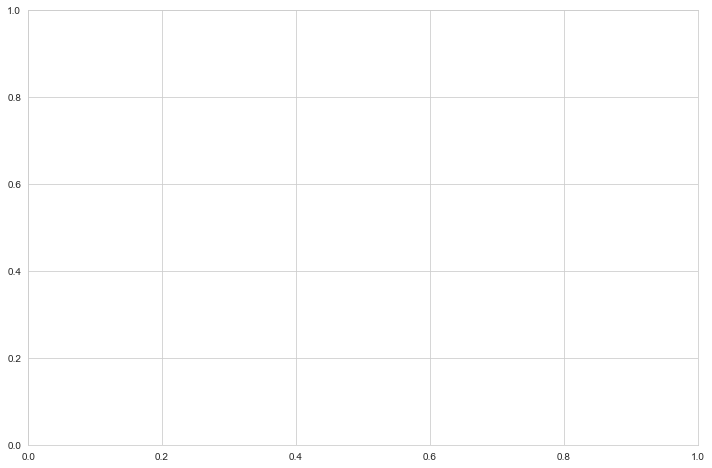

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.kdeplot(x='age', data=df, hue='salary', shade=True, ax=ax)  # or fill=True

**Check the statistical values by "salary" levels**

In [ ]:
df.groupby('salary').age.describe()

**Write down the conclusions you draw from your analysis**

**Result :** ................

## runtime

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Other Specific Analysis Questions</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1. What is the average age of males and females by income level?

### 2. What is the workclass percentages of Americans in high-level income group?

### 3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

### 4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

### 5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

### 6. What is the mean of working hours per week by gender for education level, workclass and marital status? Try to plot all required in one figure.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dropping Similar & Unneccessary Features</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Missing Value</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Final Step to Make the Dataset Ready for ML Models</p>

<a id="9"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### 1. Convert all features to numeric

### 2. Take a look at correlation between features by utilizing power of visualizing

<a id="10"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of the Project</p>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

___
